# 6 First Order Methods

We begin with developing algorithms to handle non-constraint optimization problems, $\min_{x\in\mathbb R^n}f(x)$. A general framework is given by iterative algorithm, 
$$x_{k+1}\leftarrow x_k +t_kp_k.$$
If $\nabla f(x_k)^Tp_k<0$, we call $p_k$   a descent direction.

## Gradient Descent

In classical gradient descent method, we appoint $p_k = -\nabla f(x_k)$. The very direction is also known as the steepest descent direction. We can verify that in this case $x_{k+1} = x_k +t_kp_k$ is equivalent to solving 
$$x_{k+1} = {\rm argmin} \left\{f(x_k) +\nabla f(x_k)^T(x - x_k) +\frac{1}{2t_k}\Vert x - x_k\Vert^2\right\}.$$

### Termination Criteria

Some practical termination criteria include small gradients $\Vert \nabla f(x_k)^T\Vert$, small value updates $\Vert f(x_{k+1}) - f(x_k)\Vert $, small step $\Vert x_{k+1} - x_k\Vert$. To avoid numeric unstability in dividing a tiny float, we can replace the relative error by, e.g.
$$\frac{\Vert f(x_{k+1}) - f(x_k)\Vert}{\max \{1,\Vert f(x_k)\Vert\}}.$$

### Step Size

There are several schemes available for determining the step size $t_k$. For example, a constant $t_k \equiv \alpha$, line search $t_k = {\rm argmin}f(x_k+tp_k)$ or backtracking search. 

#### Armijo Line Search

Initialize a baseline $\hat t >0, \alpha>0$ and a decay rate $\beta>0$. And in each iteration we find a smallest $s\in\mathbb N$ such that with $t_k = \hat t\beta ^s$
$$f(x_k+t_kp_k)\leqslant f(x_k) + \alpha t_k\nabla f(x_k)^Tp_k.$$

#### Example

We study an example of line search on function $f(x_1,x_2) = (x_1^2 +\gamma x_2^2)/2\ (\gamma>0)$ with initial guess $(\gamma,1)$. In each step $p_k = -[x_1,\gamma x_2]^T$. And 
$$t_k = {\rm argmin}\left\{(x_1 - tx_1)^2+\gamma(x_2 - t\gamma x_2)^2\right\}
=\frac{x_1^2+\gamma^2x_2^2}{x_1^2+\gamma^3x_2^2}.$$

There is 'zig-zag' phenomenon as displayed below.

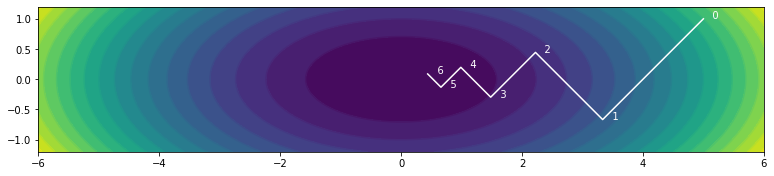

In [28]:
from matplotlib import pyplot as plt
import numpy as np
gamma = 5
x  , y = gamma , 1
xs , ys = [x] , [y]
for i in range(6):
    t = (x * x + (gamma * y)**2) / (x * x + gamma ** 3 * y ** 2)
    x = x - t * x
    y = y - t * gamma * y
    xs.append(x)
    ys.append(y)
plt.figure(figsize=(13,7))
plt.plot(xs,ys, c = 'white')
plt.xlim(-gamma - 1, gamma + 1)
plt.ylim(-1.2, 1.2)
X , Y = np.meshgrid(np.linspace(-gamma-1,gamma+1,100),np.linspace(-1.2,1.2,100))
plt.contour(X,Y, X*X + gamma*Y*Y, 20)
plt.contourf(X,Y, X*X + gamma*Y*Y, 20)
ax = plt.gca()
ax.set_aspect(1)
for i in range(len(xs)):
    plt.text(xs[i],ys[i], '   %d'%i, c = 'white')

## Convergence Analysis

To study the convergence of the iterative algorithm, for convenience we assume that $f$ is differentiable over $\mathbb R^n$ and the derivative has certain Lipschitz continuity characterized as below.

### Lipschitz Continuity

A function is Lipschitz continuous with parameter $L$ over a domain $D$ if for any $x,y\in D$ we have $$\Vert f(x) - f(y)\Vert\leqslant L\Vert x - y\Vert.$$

It is clear that, if a function is Lipschitz continuous, it is certainly continuous.

#### Quadratic Bound

If a differentiable function $f$ has derivative $\nabla f$ Lipschitz continuous over the domain with parameter $L$, then 
$$f(y)\leqslant f(x) + \nabla f(x)^T(y-x)+\frac L2\Vert y - x\Vert^2.$$

And thus $\frac L2x^Tx - f(x)$ is convex.

Proof:  
 $$\begin{aligned}f(y) -f(x) &= \int_0^1 \frac{\partial}{\partial t}f(x+t(y-x))dt
 =\int_0^1 \nabla f(x+t(y-x))^T(y-x)dt\\ 
 &\leqslant \int_0^1\left(\nabla f(x)^T(y-x) + tL\Vert y - x\Vert^2\right)dt\\ 
 &= \nabla f(x)^T(y-x) +\frac L2\Vert y - x\Vert^2\end{aligned}$$
$g(x) =\frac L2x^Tx - f(x)$ is convex because
$$\begin{aligned}g(y) - g(x)& = \frac L2(y^Ty - x^Tx) - (f(y) -f(x))
\geqslant \frac L2(y^Ty - x^Tx) - \left(\nabla f(x)^T(y-x)+\frac L2\Vert y-x\Vert^2\right)\\
&=Lx^T(y-x) - \nabla f(x)^T(y-x)=\nabla g(x)^T(y-x).
\end{aligned}$$

### Sufficient Downcrease

Assume $\nabla f$ is Lipschitz continuous with parameter $L$, and $f$ has finite infimum. If the step size 
$t\in (0,\frac 2L)$ is a constant, then the gradient decrease must converge.

Proof: Take $y = x - t\nabla f(x)$ in the quadratic bound above we obtain 
$$f(x) - f(x-t\nabla f(x))\geqslant t\left(1 - \frac{Lt}{2}\right)\Vert \nabla f(x)\Vert^2.$$
This implies that  $f(x_k) - f(x_{k+1})\geqslant  t\left(1 - \frac{Lt}{2}\right)\Vert \nabla f(x_k)\Vert^2$. Sum these up and we laarn
$$f(x_0) - f(x_n) \geqslant t\left(1 - \frac{Lt}{2}\right)\sum_{k=0}^{n-1}\Vert \nabla f(x_k)\Vert^2.$$
Yet we know that $f(x_n)$ is bounded so $\nabla f(x_k)\rightarrow 0$. Also, 
$\min_{k\leqslant n}\Vert \nabla f(x)\Vert\leqslant \sqrt\frac{f(x_0) - f^*}{nt\left(1 - \frac{Lt}{2}\right)}$.

#### Exact Line Search

When applying the exact line search, on each iteration for whatever $t$ we have 
$$f(x_k) - f(x_{k+1})\geqslant  f(x_k) - f(x_k - t\nabla f(x_k))\geqslant t\left(1 - \frac{Lt}{2}\right)\Vert \nabla f(x_k)\Vert^2\quad \forall t\in\mathbb R.$$
In particular we take $t = \frac 1L$ to obtain $f(x_k) - f(x_{k+1})\geqslant \frac{1}{2L}\Vert f(x_k)\Vert^2$.


### Convex Functions
Assume $\nabla f$ is Lipschitz continuous with parameter $L$, and $f$ is **convex** and has finite infimum. If the step size 
$t\in (0,\frac 1L)$ is a constant, then the gradient decrease must converge.

Proof: On the one hand, 
$$f(x) - f(x-t\nabla f(x))\geqslant t\left(1 - \frac{Lt}{2}\right)\Vert \nabla f(x)\Vert^2
\geqslant \frac 12 t\Vert \nabla f(x)\Vert^2.$$
On the other, the convexity ensures that 
$f(x_*)\geqslant f(x) +\nabla f(x)^T(x_* - x)$. It implies that we can bound $f(x)$ by its gradient and the global minimizer, 
$$ \begin{aligned}f(x-t\nabla f(x))&\leqslant f(x) -\frac t2\Vert \nabla f(x)\Vert^2
\leqslant f(x_*)-\nabla f(x)^T(x_* - x)-\frac t2\Vert \nabla f(x)\Vert^2\\ &
=f(x_*) - \frac t2\left\Vert\nabla f(x) +\frac 1t (x_* - x)\right\Vert^2+\frac{1}{2t}\Vert x_* - x\Vert^2\\ 
&= f(x_*) - \frac {1}{2t}\left\Vert (t\nabla f(x) - x) + x_*\right\Vert^2+\frac{1}{2t}\Vert x_* - x\Vert^2.
\end{aligned}$$ 
This, in other words, is
$$0\leqslant f(x_{k+1})- f(x_*)\leqslant \frac{1}{2t}\left(\Vert x_* - x_k\Vert^2 - \Vert x_* - x_{k+1}\Vert^2\right). $$
So the distance of $x_k$ to the optimal value is monotonically decreasing. Further, sum these up and we get
$$n\left(f(x_n) - f(x_*)\right) \leqslant \frac{1}{2t}\Vert x_* - x_0\Vert^2.$$

### Strong Convexity 

Call $f$ is strongly convex if there exists some $\mu>0$ such that $f(x)-\frac{\mu}{2}x^Tx$ is still convex. One can verify that  a strongly convex $f$ has the property that 
$$f(y)\geqslant f(x) + \nabla f(x)^T(y-x)+\frac{\mu}{2}x^Tx.$$

If $\nabla f$ also has Lipschitz parameter $L$, then it is clear that $\mu\leqslant L$.

#### Linear Convergence

Gradient descent on strongly convex functions have linear convergence.

By slightly modifying the argument above we obtain
$$0\leqslant f(x_{k+1})- f(x_*)\leqslant \frac{1}{2t}\left(\Vert x_* - x_k\Vert^2 - \Vert x_* - x_{k+1}\Vert^2\right) -\frac\mu 2\Vert x_* - x_k\Vert^2.$$
Hence
$$\Vert x_*- x_{k+1}\Vert^2\leqslant (1 - \mu t)
\Vert x_* - x_k \Vert^2\leqslant \left(1 - \frac\mu L\right)\Vert x_* - x_k \Vert^2 $$
Further, because
$$\begin{aligned}f(x_*) &\geqslant f(x) + \nabla f(x)^T(x_* - x) +\frac \mu 2\Vert x_* - x\Vert^2 \\ &
\geqslant f(x) + \frac \mu 2\left\Vert\frac 1\mu\nabla f(x) + x_* - x\right\Vert^2-\frac{1}{2\mu}\Vert \nabla f(x) \Vert^2\\ &\geqslant f(x) - \frac{1}{2\mu}\Vert \nabla f(x) \Vert^2,
\end{aligned}$$
we have
$$f(x) - f(x-t\nabla f(x))\geqslant \frac 12t\Vert \nabla f(x) \Vert^2
\geqslant \mu t\left(f(x_*) - f(x)\right) ,$$
or, 
$$f(x_{k+1}) - f(x_*)\leqslant\left(1 -\mu t\right)(f(x_k) - f(x_*))\leqslant  \left(1 - \frac\mu L\right)(f(x_k) - f(x_*)).$$